In [9]:
import pandas as pd
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [10]:
#Cargamos los datos de Fashion-MNIST

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
conver= pd.DataFrame(y_train)
conver.head(5)



,0
0,9
1,0
2,0
3,3
4,0


In [11]:
# catalogo de prendas 
tipoprenda = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


In [12]:
#convertimos los datos en el formato correcto
img_rows, img_cols = 28, 28
if K.image_data_format()=='channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape=(1, img_rows, img_cols)
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [13]:
#convertimos los datos en el formato float32 y normalizamos entre 0 y 1
x_train = x_train.astype ('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [14]:
#convertimos las etiquetas en formato one-bot
num_classes=10
y_train= keras.utils.to_categorical(y_train, num_classes)
y_test= keras.utils.to_categorical(y_test, num_classes)

In [15]:
#Definimos el modelado de la prediccion 
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation = 'relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
#Compilacion del modelo
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [17]:
#Entrenar el modelo
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 96s 110ms/step - loss: 2.2088 - accuracy: 0.2050 - val_loss: 2.0752 - val_accuracy: 0.4703
Epoch 2/10
844/844 [==============================] - 86s 102ms/step - loss: 1.9969 - accuracy: 0.3740 - val_loss: 1.8189 - val_accuracy: 0.5812
Epoch 3/10
844/844 [==============================] - 88s 104ms/step - loss: 1.7706 - accuracy: 0.4517 - val_loss: 1.5637 - val_accuracy: 0.6432
Epoch 4/10
844/844 [==============================] - 87s 103ms/step - loss: 1.5726 - accuracy: 0.4950 - val_loss: 1.3569 - val_accuracy: 0.6567
Epoch 5/10
844/844 [==============================] - 93s 110ms/step - loss: 1.4272 - accuracy: 0.5275 - val_loss: 1.2109 - val_accuracy: 0.6607
Epoch 6/10
844/844 [==============================] - 86s 102ms/step - loss: 1.3276 - accuracy: 0.5466 - val_loss: 1.1065 - val_accuracy: 0.6650
Epoch 7/10
844/844 [==============================] - 86s 101ms/step - loss: 1.2478 - accuracy: 0.5664 - val_loss: 1.0276 - val_ac

In [18]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.9161 - accuracy: 0.6890
Test accuracy: 0.6890000104904175


In [19]:
# predicciones 
predictions = model.predict(x_test)

313/313 [==============================] - 6s 14ms/step


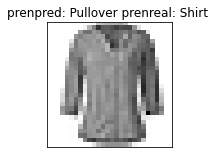

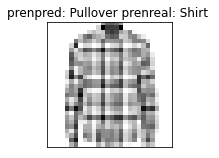

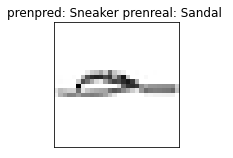

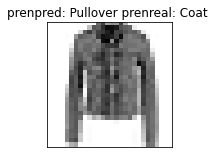

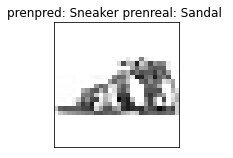

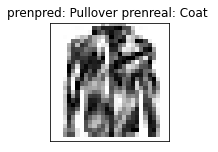

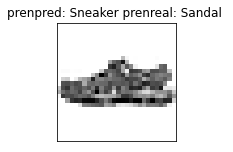

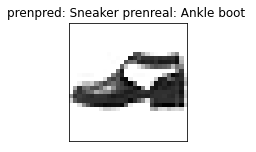

In [43]:
# clasificacion de prendas predichas y prendas reales y visualizacion de las prendas que tuvieron error
    import matplotlib.pyplot as plt
n=0
for i in range(25):
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax( y_test[i])
    if true_label != predicted_label:
        plt.figure(figsize=(10,10))
        n=n+1
        plt.subplot(5,5,n)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.title(f"prenpred: {tipoprenda.get(predicted_label)} prenreal: {tipoprenda.get(true_label)} ")
        plt.imshow(x_test[i], cmap=plt.cm.binary)
        plt.tight_layout()
        plt.show()

